<a href="https://colab.research.google.com/github/namlobo/Arcade_model/blob/main/io_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
dataset = pd.read_csv('GameStats.csv')
x=dataset.iloc[:-1,:-1 ].values
y=dataset.iloc[:, -1].values


In [ ]:
dataset

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,Level_520,30,False,1.579998,150,0.000000
1,9/7/2019 2:44:46 PM,Level_520,30,False,3.805001,100,0.000000
2,9/7/2019 2:59:20 PM,Level_520,30,False,1.783006,50,0.000000
3,9/7/2019 2:59:28 PM,Level_520,30,True,0.263020,0,0.000000
4,9/7/2019 2:59:48 PM,Level_520,30,True,3.318019,50,0.000000
...,...,...,...,...,...,...,...
6809,9/9/2019 10:02:06 AM,Level_715,42,False,0.446003,50,0.379967
6810,9/9/2019 10:02:36 AM,Level_715,42,True,29.362510,4050,0.390205
6811,9/9/2019 10:03:08 AM,Level_798,50,True,32.295620,4000,0.325681
6812,9/9/2019 10:03:29 AM,Level_846,18,False,20.059530,1300,0.332798


In [ ]:
dataset['ElapsedTime'] = dataset['ElapsedTime']*4


In [ ]:
dataset

,Date,Level,NumBlocks,IsWin,ElapsedTime,Score,Accuracy
0,9/7/2019 2:43:29 PM,Level_520,30,False,6.319992,150,0.000000
1,9/7/2019 2:44:46 PM,Level_520,30,False,15.220004,100,0.000000
2,9/7/2019 2:59:20 PM,Level_520,30,False,7.132024,50,0.000000
3,9/7/2019 2:59:28 PM,Level_520,30,True,1.052081,0,0.000000
4,9/7/2019 2:59:48 PM,Level_520,30,True,13.272076,50,0.000000
...,...,...,...,...,...,...,...
6809,9/9/2019 10:02:06 AM,Level_715,42,False,1.784012,50,0.379967
6810,9/9/2019 10:02:36 AM,Level_715,42,True,117.450040,4050,0.390205
6811,9/9/2019 10:03:08 AM,Level_798,50,True,129.182480,4000,0.325681
6812,9/9/2019 10:03:29 AM,Level_846,18,False,80.238120,1300,0.332798


In [ ]:
columns_to_remove = ['Date']

# Remove unwanted columns
df = dataset.drop(columns=columns_to_remove)

df['Level'] = df['Level'].str.replace('Level_', '').astype(int)
print(df)

      Level  NumBlocks  IsWin  ElapsedTime  Score  Accuracy
0       520         30  False     6.319992    150  0.000000
1       520         30  False    15.220004    100  0.000000
2       520         30  False     7.132024     50  0.000000
3       520         30   True     1.052081      0  0.000000
4       520         30   True    13.272076     50  0.000000
...     ...        ...    ...          ...    ...       ...
6809    715         42  False     1.784012     50  0.379967
6810    715         42   True   117.450040   4050  0.390205
6811    798         50   True   129.182480   4000  0.325681
6812    846         18  False    80.238120   1300  0.332798
6813    609         62  False    38.039976   2100  0.381122

[6814 rows x 6 columns]


In [ ]:
score_threshold = 5000

In [ ]:
dataset['Difficulty'] = 0
dataset.loc[df['Score'] < score_threshold, 'Difficulty'] = 1

In [ ]:
print(df.head())

   Level  NumBlocks  IsWin  ElapsedTime  Score  Accuracy  Difficulty
0    520         30  False     6.319992    150       0.0           1
1    520         30  False    15.220004    100       0.0           1
2    520         30  False     7.132024     50       0.0           1
3    520         30   True     1.052081      0       0.0           1
4    520         30   True    13.272076     50       0.0           1


In [ ]:
x = df.iloc[:, :]

In [ ]:
print(x)

      Level  NumBlocks  IsWin  ElapsedTime  Score  Accuracy  Difficulty
0       520         30  False     6.319992    150  0.000000           1
1       520         30  False    15.220004    100  0.000000           1
2       520         30  False     7.132024     50  0.000000           1
3       520         30   True     1.052081      0  0.000000           1
4       520         30   True    13.272076     50  0.000000           1
...     ...        ...    ...          ...    ...       ...         ...
6809    715         42  False     1.784012     50  0.379967           1
6810    715         42   True   117.450040   4050  0.390205           1
6811    798         50   True   129.182480   4000  0.325681           1
6812    846         18  False    80.238120   1300  0.332798           1
6813    609         62  False    38.039976   2100  0.381122           1

[6814 rows x 7 columns]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=1)

In [ ]:
print(x_train)

      Level  NumBlocks  IsWin  ElapsedTime  Score  Accuracy  Difficulty
1304    519         21   True     43.49932   1500  0.377396           1
5107    609         62  False     54.03596   3650  0.315291           1
3022    660         28   True    102.01600   2600  0.331302           1
6662    378         27  False     20.04000   1200  0.388832           1
6703    494         39   True     81.34400   2100  0.328647           1
...     ...        ...    ...          ...    ...       ...         ...
905     492        110   True    339.53900  11500  0.388178           0
5192    660         28   True     64.52000   2600  0.324591           1
3980    380         32   True    165.04640   3600  0.317085           1
235     849         43   True     48.33788   3650  0.385772           1
5157    715         42  False     44.44792   1700  0.336997           1

[5451 rows x 7 columns]


In [ ]:
print(x_test)

      Level  NumBlocks  IsWin  ElapsedTime  Score  Accuracy  Difficulty
4697    849         43  False     4.120152    150  0.301870           1
3715    379         28   True    52.206880   1400  0.328937           1
2311    715         42   True   128.320600   4050  0.367003           1
5488    491         35   True   100.700000   1750  0.362054           1
1536    519         21   True    71.207040   1500  0.352520           1
...     ...        ...    ...          ...    ...       ...         ...
2379    849         43  False    57.382640   1100  0.393000           1
2968    604         56   True    99.000040   3000  0.365205           1
2646    378         27   True    98.488640   3050  0.376656           1
4245    596         50   True   119.358840   4000  0.365569           1
1941    848         48   True   232.850160   4800  0.339994           1

[1363 rows x 7 columns]


In [ ]:
print(y_train)

[0.3773959 0.315291  0.3313022 ... 0.317085  0.3857721 0.3369974]


In [ ]:
print(y_test)

[0.3018697 0.3289368 0.3670027 ... 0.3766563 0.365569  0.3399937]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test =  sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.48981572 -1.03214871  1.04638759 ... -0.46268042  0.83534242
   0.17722768]
 [ 0.07161933  0.9551864  -0.95566883 ...  0.65943461 -0.98523058
   0.17722768]
 [ 0.38976586 -0.6928476   1.04638759 ...  0.11142495 -0.51587054
   0.17722768]
 ...
 [-1.35692097 -0.49896125  1.04638759 ...  0.63333891 -0.9326404
   0.17722768]
 [ 1.56877947  0.03422622  1.04638759 ...  0.65943461  1.08088639
   0.17722768]
 [ 0.73286506 -0.01424536 -0.95566883 ... -0.35829762 -0.3489187
   0.17722768]]


In [ ]:
print(x_test)

[[ 1.56877947  0.03422622 -0.95566883 ... -1.16726427 -1.37866904
   0.17722768]
 [-1.36315914 -0.6928476   1.04638759 ... -0.51487181 -0.58521101
   0.17722768]
 [ 0.73286506 -0.01424536  1.04638759 ...  0.8682002   0.53067114
   0.17722768]
 ...
 [-1.3693973  -0.74131919  1.04638759 ...  0.34628623  0.81366143
   0.17722768]
 [-0.00947684  0.37352734  1.04638759 ...  0.8421045   0.48864297
   0.17722768]
 [ 1.56254131  0.27658416  1.04638759 ...  1.25963567 -0.26108371
   0.17722768]]


In [ ]:
x = df[['Level','NumBlocks','ElapsedTime','Score','Accuracy']]
y = df['IsWin']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[-0.64823022 -0.1622015  -0.03030025 -0.25285453 -0.69494832]
 [ 0.39161017 -0.69152358 -0.03030024  0.10747451  0.86920036]
 [-0.66702251 -0.35468225 -0.03030025 -0.33006789  0.93728062]
 ...
 [-0.65449432  0.65584172 -0.03030025  0.49354133 -0.85685074]
 [-0.48536365 -0.64340339 -0.03030025 -0.3043301   1.29613743]
 [ 1.55673253 -1.17272547 -0.03030024 -0.45875683 -0.97526525]]


In [ ]:
print(x_test)

[[-0.49162775 -1.0283649  -0.03030025 -0.45875683  0.09240821]
 [ 0.07214113  0.94456285 -0.03030024  0.93108372 -1.26433844]
 [ 1.56926073  0.27088021 -0.03030023  1.23993718  1.09053755]
 ...
 [ 0.39161017 -0.69152358 -0.03030024  0.10747451  0.97575127]
 [-0.49162775 -1.0283649  -0.03030026 -1.20515268 -0.66761683]
 [ 0.04082064  0.65584172 -0.03030026 -0.92203701  0.49592342]]


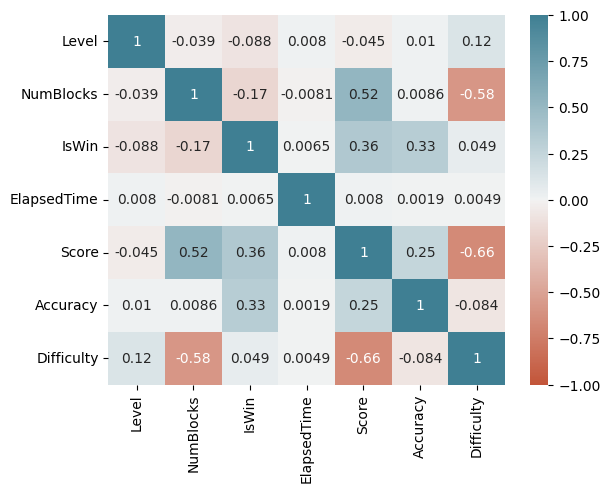

In [ ]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.show()

In [ ]:
score = df['Score']
accuracy = df['Accuracy']
nblocks = df['NumBlocks']


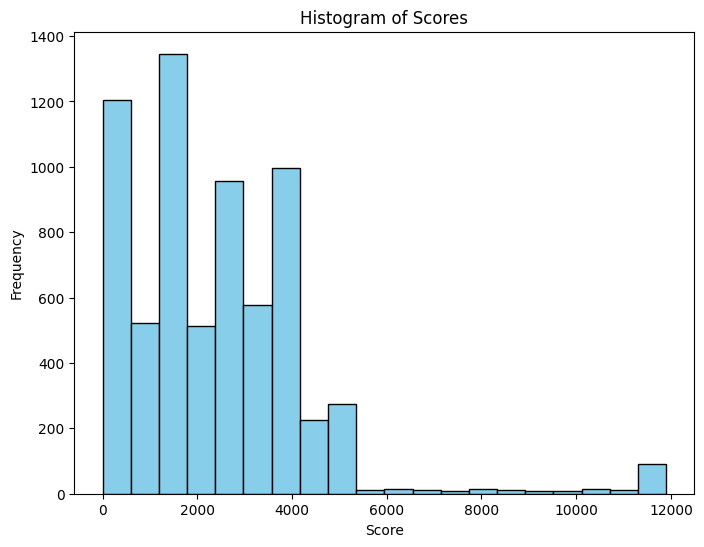

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(score, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Histogram of Scores')
plt.show()

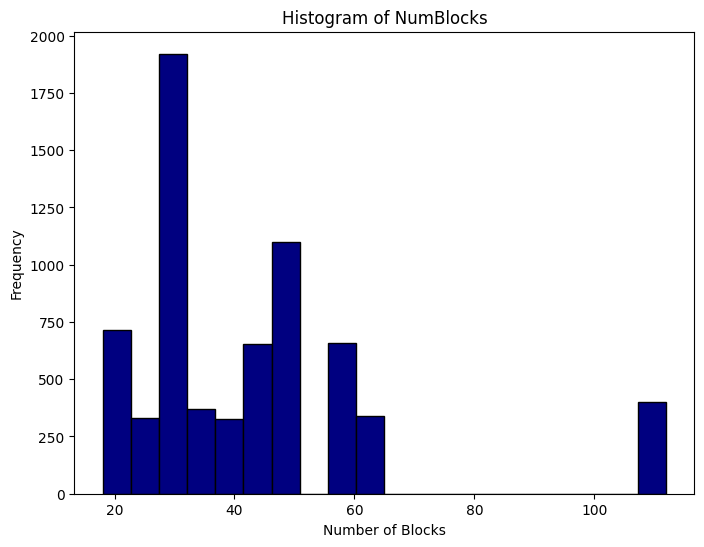

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(nblocks, bins=20, color='navy', edgecolor='black')
plt.xlabel('Number of Blocks')
plt.ylabel('Frequency')
plt.title('Histogram of NumBlocks')
plt.show()

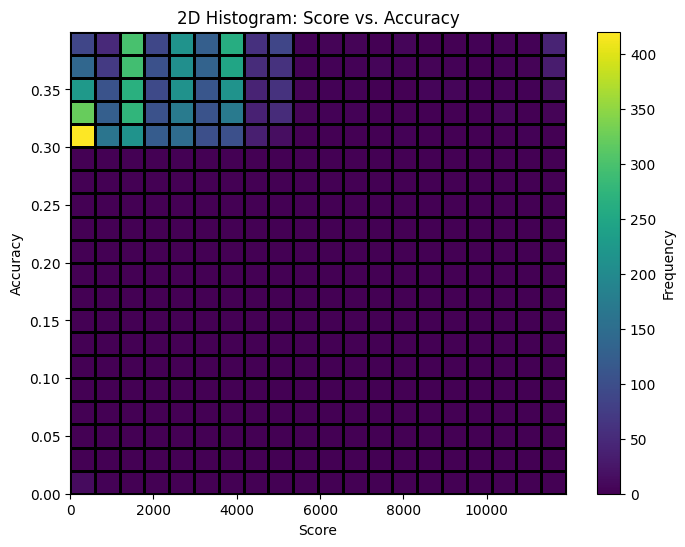

In [ ]:
plt.figure(figsize=(8,6))
plt.hist2d(score, accuracy, bins=(20,20), color='skyblue', edgecolor='black')
plt.colorbar(label='Frequency')
plt.xlabel('Score')
plt.ylabel('Accuracy')
plt.title('2D Histogram: Score vs. Accuracy')
plt.show()

In [ ]:
x = df[['Score', 'Accuracy']]
y = df['Difficulty']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
k=5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test,  y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9977989728539985
Confusion Matrix
[[  34    1]
 [   2 1326]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      1363
   macro avg       0.97      0.98      0.98      1363
weighted avg       1.00      1.00      1.00      1363



<function matplotlib.pyplot.show(close=None, block=None)>

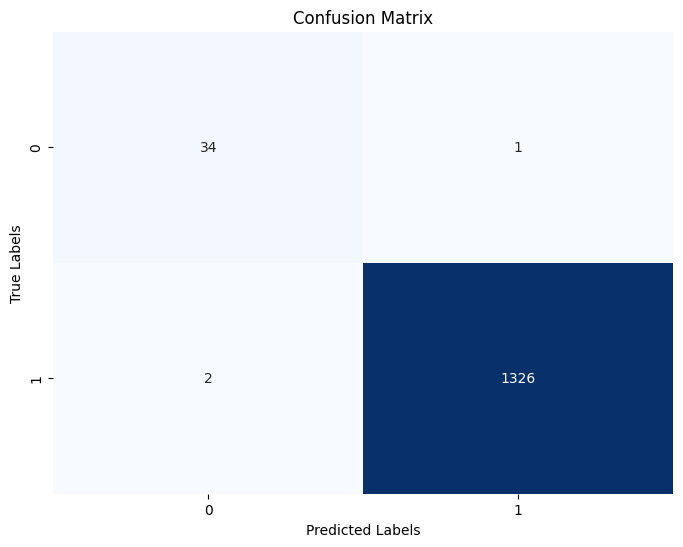

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot =True, fmt='d',cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.9985326485693323
Confusion Matrix:
[[  33    2]
 [   0 1328]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       1.00      1.00      1.00      1328

    accuracy                           1.00      1363
   macro avg       1.00      0.97      0.98      1363
weighted avg       1.00      1.00      1.00      1363



In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9611151870873074
Confusion Matrix:
[[  35    0]
 [  53 1275]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57        35
           1       1.00      0.96      0.98      1328

    accuracy                           0.96      1363
   macro avg       0.70      0.98      0.77      1363
weighted avg       0.98      0.96      0.97      1363



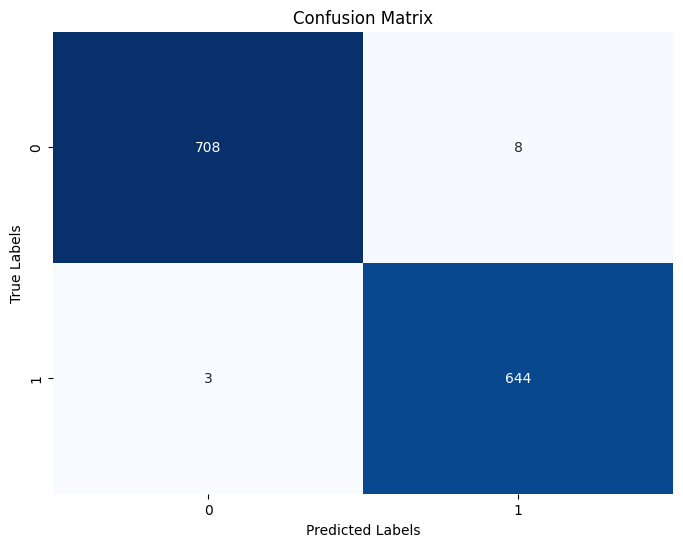

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()